<a href="https://colab.research.google.com/github/bennymagid/bennymagid.github.io/blob/master/AI_perceptron_and_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D

"""
Author: Kelsey D'Souza

This file contains two functions for visualizing 2-feature labeled datasets.
Its purpose is to give you ideas on how to vizualize your data and use pandas
and matplotlib, feel free to snippets of any code in here or import the file 
into your programs.

This file *does not* need to be included in your submission unless imported.

visualize_scatter
	Assumes binary labels and creates a line between the data using the given 
	feature and bias weights. 
	Note: weights should be input as [w1, w2, bias]

visualize_3d
	Plots data points in 3D space using feat1 x feat2 on the x-y base, and 
	label as the data point height along the z-axis.
	It then creates a 3D surface plot of the continuous label model using
	the given linear regressor weights.

"""

def visualize_scatter(df, feat1=0, feat2=1, labels=2, weights=[-1, -1, 1],
                      title=''):
    """
        Scatter plot feat1 vs feat2.
        Assumes +/- binary labels.
        Plots first and second columns by default.
        Args:
          - df: dataframe with feat1, feat2, and labels
          - feat1: column name of first feature
          - feat2: column name of second feature
          - labels: column name of labels
          - weights: [w1, w2, b] 
    """

    # Draw color-coded scatter plot
    colors = pd.Series(['r' if label > 0 else 'b' for label in df[labels]])
    ax = df.plot(x=feat1, y=feat2, kind='scatter', c=colors)

    # Get scatter plot boundaries to define line boundaries
    xmin, xmax = ax.get_xlim()

    # Compute and draw line. ax + by + c = 0  =>  y = -a/b*x - c/b
    a = weights[0]
    b = weights[1]
    c = weights[2]

    def y(x):
        return (-a/b)*x - c/b

    line_start = (xmin, xmax)
    line_end = (y(xmin), y(xmax))
    line = mlines.Line2D(line_start, line_end, color='red')
    ax.add_line(line)


    if title == '':
        title = 'Scatter of feature %s vs %s' %(str(feat1), str(feat2))
    ax.set_title(title)

    plt.show()
    
def visualize_3d(df, lin_reg_weights=[1,1,1], feat1=0, feat2=1, labels=2,
                 xlim=(-2, 2), ylim=(-2, 4), zlim=(-2, 3),
                 alpha=0., xlabel='age (normalized)', ylabel='weight (normalized)', zlabel='height (normalized)',
                 title=''):
    """ 
    3D surface plot. 
    Main args:
      - df: dataframe with feat1, feat2, and labels
      - feat1: int/string column name of first feature
      - feat2: int/string column name of second feature
      - labels: int/string column name of labels
      - lin_reg_weights: [b_0, b_1 , b_2] list of float weights in order
    Optional args:
      - x,y,zlim: axes boundaries. Default to -1 to 1 normalized feature values.
      - alpha: step size of this model, for title only
      - x,y,z labels: for display only
      - title: title of plot
    """

    # Setup 3D figure
    ax = plt.figure().gca(projection='3d')
    #plt.hold(True) #deprecated

    # Add scatter plot
    ax.scatter(df[feat1], df[feat2], df[labels])

    # Set axes spacings for age, weight, height
    axes1 = np.arange(xlim[0], xlim[1], step=.05)  # age
    axes2 = np.arange(xlim[0], ylim[1], step=.05)  # weight
    axes1, axes2 = np.meshgrid(axes1, axes2)
    axes3 = np.array( [lin_reg_weights[0] +
                       lin_reg_weights[1]*f1 +
                       lin_reg_weights[2]*f2  # height
                       for f1, f2 in zip(axes1, axes2)] )
    plane = ax.plot_surface(axes1, axes2, axes3, cmap=cm.Spectral,
                            antialiased=False, rstride=1, cstride=1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_xlim3d(xlim)
    ax.set_ylim3d(ylim)
    ax.set_zlim3d(zlim)

    if title == '':
        title = 'LinReg Height with Alpha %f' % alpha
    ax.set_title(title)

    plt.show()



In [38]:
def perceptron(df):


  features = df.iloc[:,:2]
  labels = df[:][2]

  #[w1, w2, w0]
  weights = np.zeros(3)
  weights_history = pd.DataFrame()



  dummy = pd.Series(data = [1], index = [2]) #x0 = 1

  misclass = 1
  count = 0

  while misclass > 0:
    misclass = 0
    #iterate over all x,y - each row of csv
    for i in range(len(features)):

      y_actual = labels.iloc[i]
      x_pair = features.iloc[i] # [x1, x2]

      dot = np.dot(weights, x_pair.append(dummy))
      guess = -1 if dot <= 0 else 1

      if y_actual * guess <= 0 :
        misclass +=1
        #update weights
        for j in range(2):
          weights[j] += x_pair[j] * y_actual
        #update b
        weights[-1] = weights[-1] + y_actual
        #visualize_scatter(df, weights = weights)

    count +=1
    #print(weights)

    toAppend = pd.Series(data = weights)
    weights_history = weights_history.append(toAppend, ignore_index=True)



  return weights, weights_history

     0  1   2
0    8  3   3
1    3  9   6
2   12  6  10
3    6  1  12
4    7  9  15
5    5  2  16
6    5 -1  18
7    6  7  21
8    3  8  23
9   -1 -2  24
10   2  7  26
11   3  3  28
12   3  6  30
13   0  7  32
14   1  3  34
15   1  6  36
16   2  2  38
17   2  5  40
18  -5 -2  39


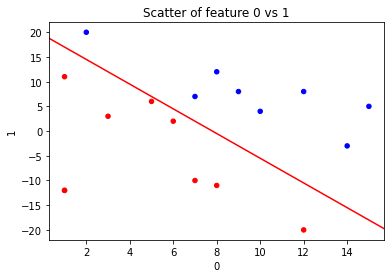

In [42]:
def main():
  sys.argv = ['pla.py','data1.csv', 'results1.csv']
  inputFile= sys.argv[1]
  outputFile = sys.argv[2]

  df = pd.read_csv(inputFile, header=None)
  weights, weights_history = perceptron(df)
  #write to output file
  weights_history = weights_history[:-1] #delete duplicate in last row
  weights_history = weights_history.astype(int)
  print(weights_history)
  weights_history.to_csv(outputFile, sep='\t', index=False)

  visualize_scatter(df, weights = weights)

if __name__ == "__main__":
    """DO NOT MODIFY"""
    main()

In [62]:
#normalize all columns in a df. updates the input df
def normalize_cols(df):
  for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

def gradient_descent(x, y, betas, learningRate, iterations=100):
  for count in range(iterations):
    risk = empirical_risk(x, y, betas)
    print(count, risk)
    adjust_betas(x, y, betas, learningRate)
  return betas

def x_with_dummy(x_pair):  
  dummy = pd.Series(data = [1], index = [0]) #x0 = 1 : intercept 
  x_with_dummy = dummy.append(x_pair, ignore_index = True) # [x0, x1, x2]
  return x_with_dummy

#calculate f(xi)
def fxi(x_pair, betas):
  x_with_d = x_with_dummy(x_pair)
  return np.dot(betas, x_with_d) #f(xi)

def empirical_risk(x, y, betas):
  n = len(x)
  sum_risk = 0
  for i in range(n):
    x_pair = x.iloc[i] 
    y_actual = y.iloc[i]
    f_xi = fxi(x_pair, betas)
    sum_risk += (f_xi - y_actual)**2
  return sum_risk/(2*n)

def adjust_betas(x, y, betas, alpha):
  n = len(x)
  for j in range(1, 3):
    sum = 0
    for i in range(n):
      x_pair = x.iloc[i] 
      y_actual = y.iloc[i]
      f_xi = fxi(x_pair, betas)
      sum += (f_xi - y_actual)*x_pair[j-1]
    betas[j] -= (alpha / n) * sum

def append_data(learningRate, iterations, betas):
  metaData = pd.Series(data = [learningRate, iterations])
  the_betas = pd.Series(data = betas)
  toAppend = metaData.append(the_betas, ignore_index=True)
  return toAppend
  




0 0.49367088607594917
1 0.3892894049829624
2 0.31570129761090526
3 0.2636565293905722
4 0.22669566357784965
5 0.20030679578856098
6 0.18133735087143335
7 0.16758366836537678
8 0.15750461596039314
9 0.1500217308761957
10 0.14437973063417225
11 0.1400491454871756
12 0.13665834269749444
13 0.13394606180599197
14 0.1317282648954541
15 0.1298749787536894
16 0.12829411239025024
17 0.12692014485787909
18 0.125706214257882
19 0.12461858250635839
20 0.12363276003561258
21 0.12273079064964762
22 0.12189934752834047
23 0.12112839661181198
24 0.12041025705832557
25 0.11973893975771832
26 0.11910968069680695
27 0.11851861098729494
28 0.11796252284163643
29 0.11743870299377474
30 0.11694481359781372
31 0.11647880660693137
32 0.11603886181093319
33 0.11562334163393741
34 0.11523075784094848
35 0.11485974673693318
36 0.11450905044846076
37 0.11417750258458564
38 0.11386401707029851
39 0.11356757929538235
40 0.11328723896783975
41 0.11302210423495881
42 0.11277133675810005
43 0.11253414751450028
44 0.1

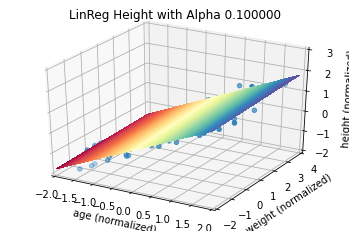

0 0.49367088607594917
1 0.16661756055093577
2 0.1264471426520958
3 0.11817030034612325
4 0.11478539284934987
5 0.11278038794941005
6 0.11144503602922584
7 0.11052429787112668
8 0.10988227932144135
9 0.10943286518372915
10 0.10911783661923115
11 0.1088968977297538
12 0.108741918245489
13 0.10863319925983589
14 0.10855693040675647
15 0.10850342558417028
16 0.10846589026939778
17 0.10843955803481191
18 0.1084210851144302
19 0.10840812575692461
20 0.10839903434347775
21 0.10839265641924903
22 0.1083881820965243
23 0.10838504321258917
24 0.10838284118270107
25 0.10838129638661101
26 0.1083802126615568
27 0.10837945239293562
28 0.10837891903959648
29 0.10837854487476004
30 0.10837828238587212
31 0.1083780982413199
32 0.1083779690578851
33 0.10837787843147444
34 0.10837781485407903
35 0.10837777025245379
36 0.10837773896295287
37 0.10837771701234306
38 0.10837770161327138
39 0.10837769081031819
40 0.10837768323169271
41 0.10837767791503874
42 0.1083776741852318
43 0.10837767156865005
44 0.108

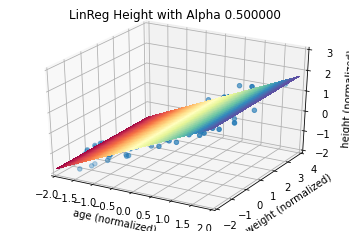

0 0.49367088607594917
1 0.11032081670401424
2 0.10891314341726112
3 0.10858627245532165
4 0.10845976709137427
5 0.10840998861705371
6 0.10839039109980084
7 0.1083826755357972
8 0.10837963790822362
9 0.10837844199028145


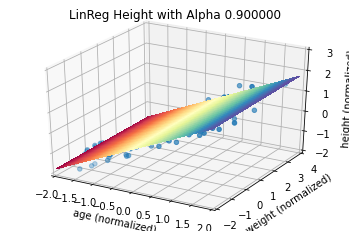

     0      1    2         3         4
0  0.1  100.0  0.0  0.850372  0.035236
1  0.5  100.0  0.0  0.876409  0.009557
2  0.9   10.0  0.0  0.875256  0.010470


In [66]:
import numpy as np
import pandas as pd
import sys

def main():
    """
    YOUR CODE GOES HERE
    Implement Linear Regression using Gradient Descent, with varying alpha values and numbers of iterations.
    Write to an output csv file the outcome betas for each (alpha, iteration #) setting.
    Please run the file as follows: python3 lr.py data2.csv, results2.csv
    """
    sys.argv = ['lr.py','data2.csv', 'results2.csv']
    inputFile= sys.argv[1]
    outputFile = sys.argv[2]
    df = pd.read_csv(inputFile, header=None)
    normalize_cols(df)

    x = df.iloc[:,:2]
    y = df[:][2]
    betas = np.zeros(3)
    learningRates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
    weights_history = pd.DataFrame()

    learningRates = learningRates[4:6]

    for learningRate in learningRates:
      new_betas = gradient_descent(x, y, betas, learningRate = learningRate)
      #print(new_betas)
      toAppend = append_data(learningRate, 100, new_betas)
      weights_history = weights_history.append(toAppend, ignore_index=True)
      visualize_3d(df, lin_reg_weights = new_betas, alpha=learningRate)
      betas = np.zeros(3) #reset betas
    
    tenth_rate = 0.9
    new_loop_count = 10
    new_betas = gradient_descent(x, y, betas, learningRate = tenth_rate, iterations=new_loop_count)
    visualize_3d(df, lin_reg_weights = new_betas, alpha=tenth_rate)
    toAppend = append_data(tenth_rate, new_loop_count, new_betas)
    weights_history = weights_history.append(toAppend, ignore_index=True)

    print(weights_history)
    weights_history.to_csv(outputFile, sep='\t', index=False)




if __name__ == "__main__":
    main()